In [1]:
# access to google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn import Module
import torchvision.transforms as transforms
opts = {'batch_size': 256, 'loss_fun': nn.CrossEntropyLoss, 'optimizer_fun':optim.Adam, 'optimizer_opts':{'lr':0.001}}
#opts = {'batch_size': 256, 'loss_fun': nn.MSELoss, 'optimizer_fun':optim.SGD, 'optimizer_opts':{'lr':0.01, 'momentum':0.9}}

In [3]:
class Net1(Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        y = F.relu(self.conv1(x))
        y = F.max_pool2d(y, (2, 2))
        y = F.relu(self.conv2(y))
        y = F.max_pool2d(y, (2, 2))
        y = y.view(y.shape[0], -1)
        y = F.relu(self.fc1(y))
        y = F.relu(self.fc2(y))
        y = self.fc3(y)
        return y

In [10]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='../data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='../data', train=False, download=True, transform=transform)

Shape of images: 28 28
Number of training images: 60000
Number of test images: 10000
Number of classes: 10
Example images:


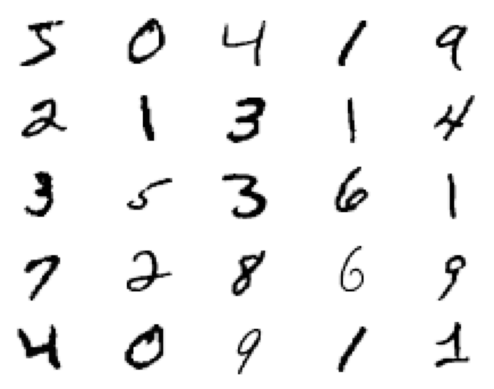

In [11]:
# We can look at our data dimension and plot some example images
n_samples,h,w = trainset.data.shape
print("Shape of images:", h, w)
print("Number of training images:", n_samples)
print("Number of test images:", testset.data.shape[0])
print("Number of classes:",len(trainset.classes))
print("Example images:")

plt.figure()
for i in range(25):
    ax=plt.subplot(5,5,i+1)
    img = trainset.data[i]
    ax.imshow(img, cmap="Greys")
    ax.axis('off')
plt.show()

In [17]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=opts['batch_size'], shuffle=True)
testloader = torch.utils.data.DataLoader(testset)

[1] loss: 129.003
[2] loss: 28.877
[3] loss: 20.079
[4] loss: 15.825
[5] loss: 12.847
[6] loss: 11.114
[7] loss: 10.019
[8] loss: 8.627
[9] loss: 7.840
[10] loss: 7.102


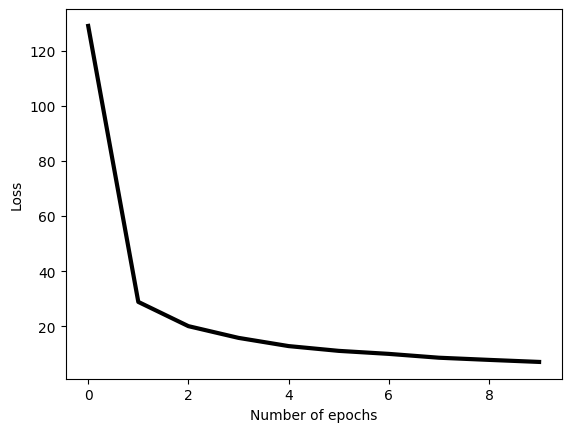

In [18]:
net1 = Net1()
criterion = opts["loss_fun"]()
optimizer = opts["optimizer_fun"](net1.parameters(), **opts["optimizer_opts"])
net1.train()
old_loss = []
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() # Accumulate losses into running_loss
    print('[%d] loss: %.3f' %(epoch + 1, running_loss))
    old_loss.append(running_loss)
    if epoch > 2:
        if running_loss > 0.9 * (old_loss[epoch-3] + old_loss[epoch-2] + old_loss[epoch-1]) / 3:
            print('Finished Training')
            break
# Plot the loss
fig,ax=plt.subplots()
ax.plot(old_loss,'k',lw=3)
ax.set_xlabel("Number of epochs")
ax.set_ylabel("Loss");

In [21]:
net1.eval()
correct=0
total=0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net1(inputs)
        if torch.argmax(outputs, dim=1)==labels:
            correct+=1
        total+=1
print('Accuracy of the network 1 on the test set: %.3f %%' % (100 * correct / total))

Accuracy of the network 1 on the test set: 98.900 %
